In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("./ml_data/mushroom.csv")

In [4]:
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
X = df.drop("poisonous",axis=1)
y = df["poisonous"]

In [7]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [8]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [9]:
#원핫 인코딩
X_onehot = pd.get_dummies(X,dtype=int)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X_onehot,y,test_size=0.3,random_state=17)

In [11]:
print("훈련용 문제: ",x_train.shape)
print("훈련용 답: ",x_test.shape)
print("테스트용 문제: ",y_train.shape)
print("테스트용 답: ",y_test.shape)


훈련용 문제:  (5686, 117)
훈련용 답:  (2438, 117)
테스트용 문제:  (5686,)
테스트용 답:  (2438,)


In [12]:
m = DecisionTreeClassifier()

In [13]:
m.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
pre = m.predict(x_test)

In [16]:
accuracy_score(pre,y_test)

1.0

In [17]:
m.score(x_test,y_test)

1.0

In [18]:
m1 = DecisionTreeClassifier(max_depth=12,min_samples_split=5)

In [19]:
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=5)

In [20]:
pre1 = m1.predict(x_test)

In [21]:
accuracy_score(pre1,y_test)

1.0

In [22]:
m1.score(x_test,y_test)

1.0

# Tree 모델 내부 시각화
- graphviz 도구 활용

In [23]:
from sklearn.tree import export_graphviz #내보내기용 도구


In [28]:
export_graphviz(m1,out_file='./ml_data/tree2.dot', # 시각화할 tree모델, 경로 및 파일명
                class_names=["독","식용"], #정답데이터 이름 설정
                feature_names=X_onehot.columns, # 원핫 인코딩 된 컬럼 이름들을 특성이름 넣어주기
                impurity=True, # 불순도 값(지니 불순도, -~0.5) 출력 여부
                filled=True) # 각 노드들의 클래스가 구분되도록 색을 칠하는 여부

### dot파일 불러와서 그래프 그리기.

In [29]:
import graphviz

with open("./ml_data/tree2.dot",encoding="utf-8") as f:
    dot_graph = f.read()

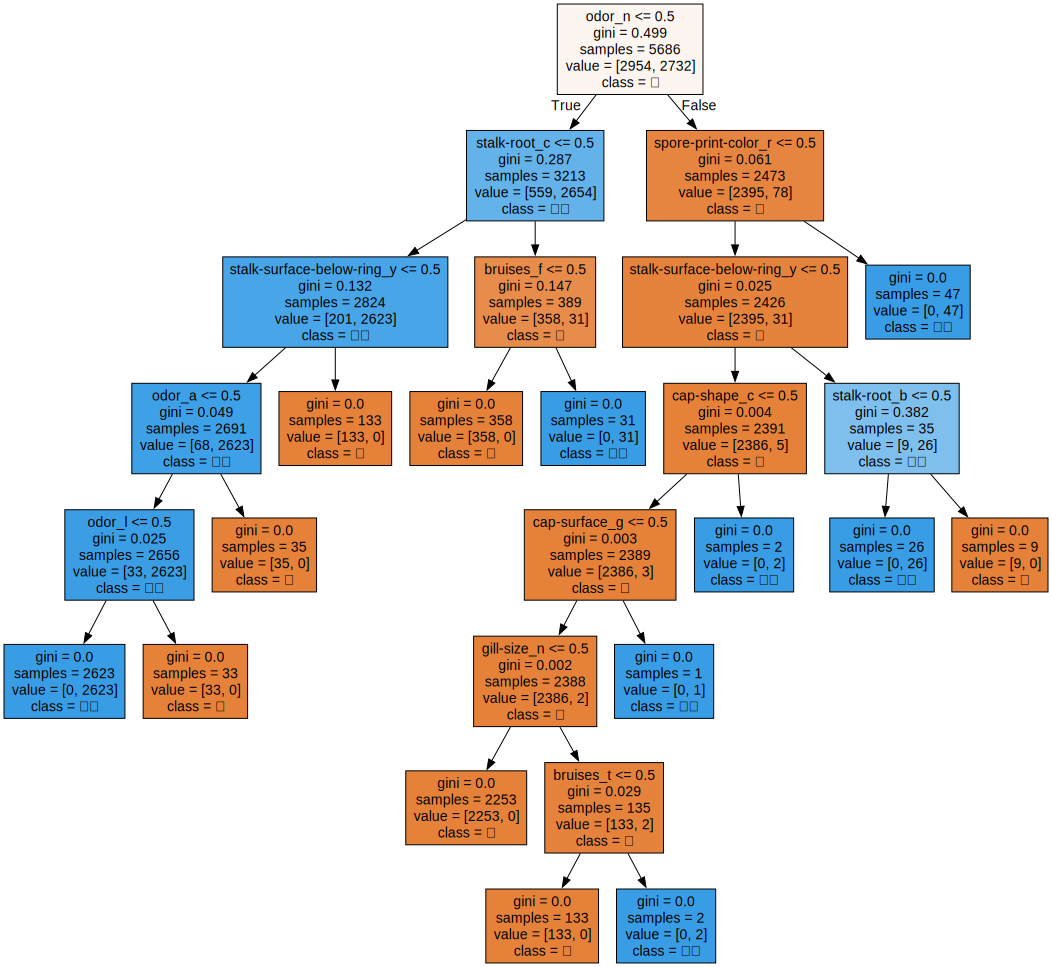

In [30]:
display(graphviz.Source(dot_graph))

### 교차검증(cross validation)
- train셋에 대해서 k개의 군집으로 나눈 후, 차례대로 세트별 학습 및 평가지표를 확인할 수 있는 검증방법
- 데이터 세트의 크기가 충분하지 않을 경우, 유용하게 사용 가능
- 5개의 군집으로 설정할 경우, 모델이 각 5개의 데이터셋에 대한 평가지표(ex.정확도)들을 확인함으로써,
  객관적인 일반화 성능을 판단하여, 모델을 선택가능.
  

In [31]:
from sklearn.model_selection import cross_val_score

In [35]:
result = cross_val_score(DecisionTreeClassifier(max_depth=3),x_train,y_train,cv=5)

In [36]:
result

array([0.98594025, 0.98416887, 0.95514512, 0.98504837, 0.9885664 ])

In [37]:
train_list = []
test_list = []

for i in range(1,11):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train,y_train)

    train_acc = tree.score(x_train,y_train)
    train_list.append(train_acc)
    
    test_acc = tree.score(x_test,y_test)
    test_list.append(test_acc)

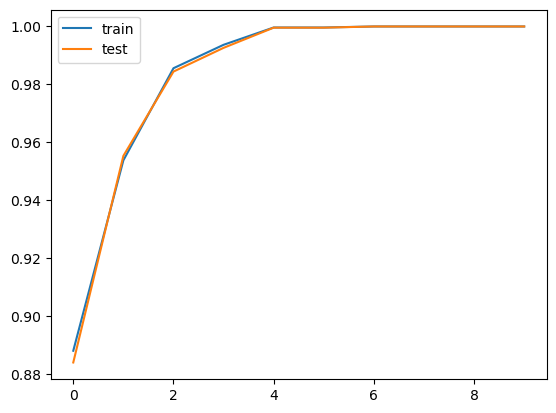

In [38]:
plt.plot(train_list,label="train")

plt.plot(test_list,label="test")

plt.legend()
plt.show()

### 특성 선택
- Tree모델에서는 데이터 특성의 중요도를 출력해볼 수 있음.
- 특성X들이 정답y에 영향을 미치는 정도를 수치화 -> 특성 중요도
- 0~1 사이의 값을 가지고, 그들의 총합은 1(1에 가까울 수록 중요한 특성)
- tree모델에서 특성중요도가 높은 컬럼의 경우, 최상단 노드로 배치


In [ ]:
fi = m1.feature_importances_

fi_df = pd.DataFrame(fi,index=X_onehot.columns,columns="특성 중요도")